<a href="https://colab.research.google.com/github/Yumpop/colab_test/blob/main/K_%EC%B5%9C%EA%B7%BC%EC%A0%91_%EC%9D%B4%EC%9B%83_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K -최근접 이웃 알고리즘

- 특성(feature) : 데이터의 특징

In [ ]:
# if fish_length>=30:
#   print('도미')

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

**선형** :  산점도의 그래프가 일직선의 가까운 형태

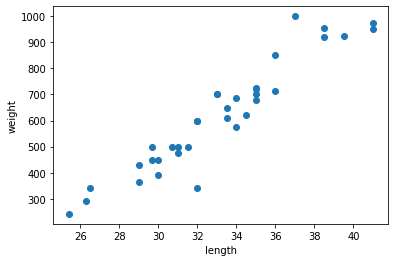

In [ ]:
import matplotlib.pyplot as plt # matplotlib 의 pylot 함수를 plt롤 줄여서 사용

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


**matplotlib** 에서 2개의 산점도를 한 그래프로 나타내기

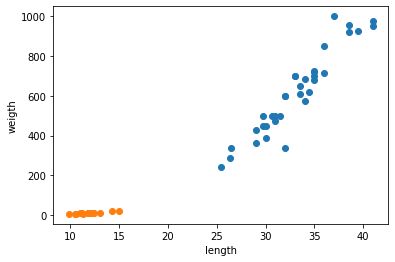

In [ ]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weigth')
plt.show()


- 지금 사용하는 머신러닝 패키지가 사이킷런 이므로 각 특성의 리스트들을 세로방향의 **2차원 리스트**를 만들어야함

- zip 함수 : 나열된 리스트에서 원소를 하나씩 꺼내주는 역할

In [ ]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

fish_data = [[l,w] for l,w in zip(length, weight)]

print(fish_data)

- kn의 객체에 fish_data와 fist_targat을 전달해서 도미를 찾기위한 기준을 학습시키기<br/>
  위 과정을 훈련(training)라고 부른다 <br/>
  사이킷 런에서는 fit()함수가 이 역할을 함

- score()  = 사이킷 런에서 모델을 평가하는 메서드 <br/>
- score()함수로 나온 값을 정확도라고 함 (범위는 0~1 사이)


In [ ]:
fish_targat = [1] * 35 + [0] * 14
# print(fish_targat)

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

kn.fit(fish_data, fish_targat)
kn.score(fish_data, fish_targat)

1.0

### k - 최근접 이웃 알고리즘 <br/>
- 원리 : 어떤 데이터에 대한 값을 구할 때 주변의 다른 데이터를 보고 다수를 차지하는 데이터를 정답으로 사용

- predict() : 새로운 정답을 예측, fit() 함수와 마찬가지로 2중리스트로 전달해야함 <br/>
 반횐된 값 array([1]) 에서 array는 나중에 설명!

In [ ]:
kn.predict([[30,600]])

array([1])

- k - 최근접 이웃 알고리즘 특징
1. 새로운 데이터를 예측할 때는 가장 가까운 직선거리의 데이터만 확인
2. 1의 특성으로 데이터가 많이 있는 경우 사용하기 어려움 (메모리가 많이 필요하고 직선거리 계산하는데 많은시간 필요함)
3. 실제로 훈련되는 과정이 없음
  - fit()메서드에 전달된 데이터를 가지고 새로운 데이터가 나타나면 가까운 데이터를 참고만 한다

- 몇개의 데이터를 참고하는가  -- 기본값은 5이다. <br/>
- 이 값은 n_neighbors매개변수로 변경 가능하다. 

만약 데이터를 49개 참고하게 된다면 어떤 데이터를 넣어도 도미로 예측 할 것<br/>
(49개의 데이터중 35개가 도미이기 때문)

In [ ]:
kn49 = KNeighborsClassifier(n_neighbors=49)
kn49.fit(fish_data, fish_targat)
kn49.score(fish_data, fish_targat)
print(35/49)

0.7142857142857143


위 셀에서 kn49.score(fish_data, fish_targat) 값과 print(35/49)값 둘다 출력 안 되는 이유
<br/> -- 코드 셀은 마지막 실행 코드의 반환값만 자동 출력

In [ ]:
for i in range(5,50):
  # k 최근접 이웃 개수 설정
  kn.n_neighbors = i  # 함수 사용방법 알기 
  # 점수 계산
  score = kn.score(fish_data, fish_targat)
  if score < 1:
    print(i, score)
    break

18 0.9795918367346939


# 훈련세트와 테스트 세트 - 새로운 파일에서 시작하기
<br/> 
깃허브 연동법 알고 나서 하기

- 머신러닝은 크게 지도학습과 비지도 학습으로 나뉜다. 
- 지도학습에서는 **입력(데이터)** 와 **타깃(정답)**이 있고 이 둘을 합쳐 **훈련데이터**라 부른다
- 비지도 학습은 타깃없이 데이터만 사용, 나중(6장)에서 공부할 예정
- 또한 강화학습이라는 것도 있는데 이 내용은 책에 안나옴
<br/>

- 위 모델에서는 훈련세트와 테스트세트가 같기 때문에 정확도가 100%가 나옴

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
fish_data = [[l,w] for l, w in zip(fish_length, fish_weight)]
fish_targat = [0]*35 + [1] * 14